## Essential libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

- Read data

In [45]:
%%time

path = "../data/housing.csv"
df = pd.read_csv(path)

CPU times: user 15.4 ms, sys: 0 ns, total: 15.4 ms
Wall time: 14.8 ms


- A quick view of df

In [3]:
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
9964,-122.52,38.53,35.0,1227.0,236.0,548.0,207.0,4.8750,336700.0,INLAND
12897,-121.33,38.64,27.0,2203.0,493.0,1158.0,492.0,2.4342,119500.0,INLAND
1585,-122.00,37.84,16.0,7681.0,946.0,2777.0,908.0,9.5271,500001.0,<1H OCEAN
10109,-117.94,33.92,32.0,1053.0,207.0,1038.0,222.0,4.6696,165500.0,<1H OCEAN
4620,-118.31,34.08,49.0,2549.0,630.0,1539.0,594.0,2.6218,350900.0,<1H OCEAN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- Some missing values

In [5]:
total_bed_na = df.query('total_bedrooms.isna()')
total_bed_na

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


- Using the forward fill

In [6]:
df['total_bedrooms'] = df['total_bedrooms'].ffill()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- Alright, everthing is fine now

- Start with train test split

In [8]:
X = df.drop(['median_house_value'], axis='columns') # Data without the target
y = df['median_house_value'] # Target

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

- The new data framework that will be used

In [10]:
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17854,-121.89,37.46,5.0,1519.0,186.0,705.0,186.0,10.3798,<1H OCEAN,500001.0
14631,-117.21,32.81,26.0,2496.0,407.0,1062.0,380.0,5.5413,NEAR OCEAN,302100.0
8631,-118.40,33.88,36.0,3022.0,482.0,1278.0,494.0,7.2651,<1H OCEAN,500001.0
6251,-117.97,34.04,32.0,1507.0,295.0,1326.0,324.0,4.1190,<1H OCEAN,163300.0
3227,-119.64,36.32,32.0,2205.0,523.0,1772.0,479.0,1.3569,INLAND,43100.0
...,...,...,...,...,...,...,...,...,...,...
18289,-122.11,37.38,22.0,3638.0,719.0,1329.0,650.0,5.0804,NEAR BAY,500001.0
3283,-122.80,39.08,17.0,1880.0,467.0,798.0,342.0,1.4676,INLAND,65000.0
3330,-122.48,38.90,10.0,304.0,63.0,161.0,61.0,2.1964,INLAND,112500.0
563,-122.24,37.75,45.0,891.0,289.0,384.0,146.0,4.9489,NEAR BAY,247100.0


- Basic histogram plot

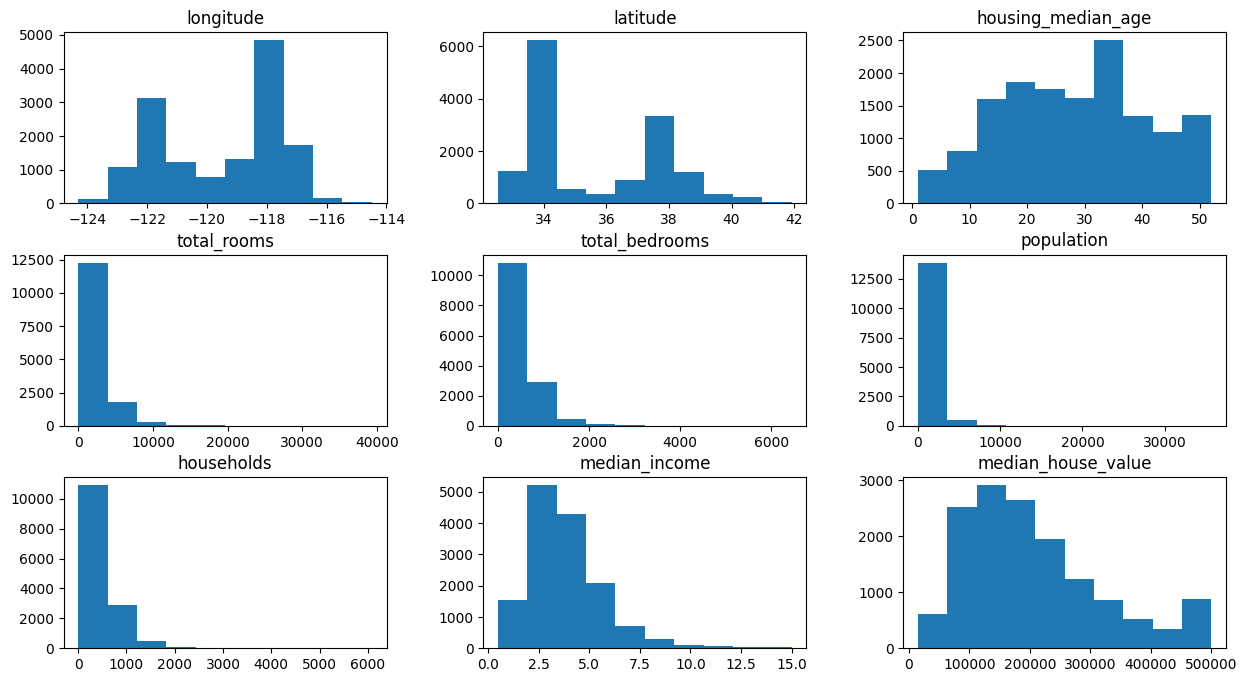

In [11]:
train_data.hist(figsize=(15, 8), grid=False)
plt.show()

- basic heatmap plot

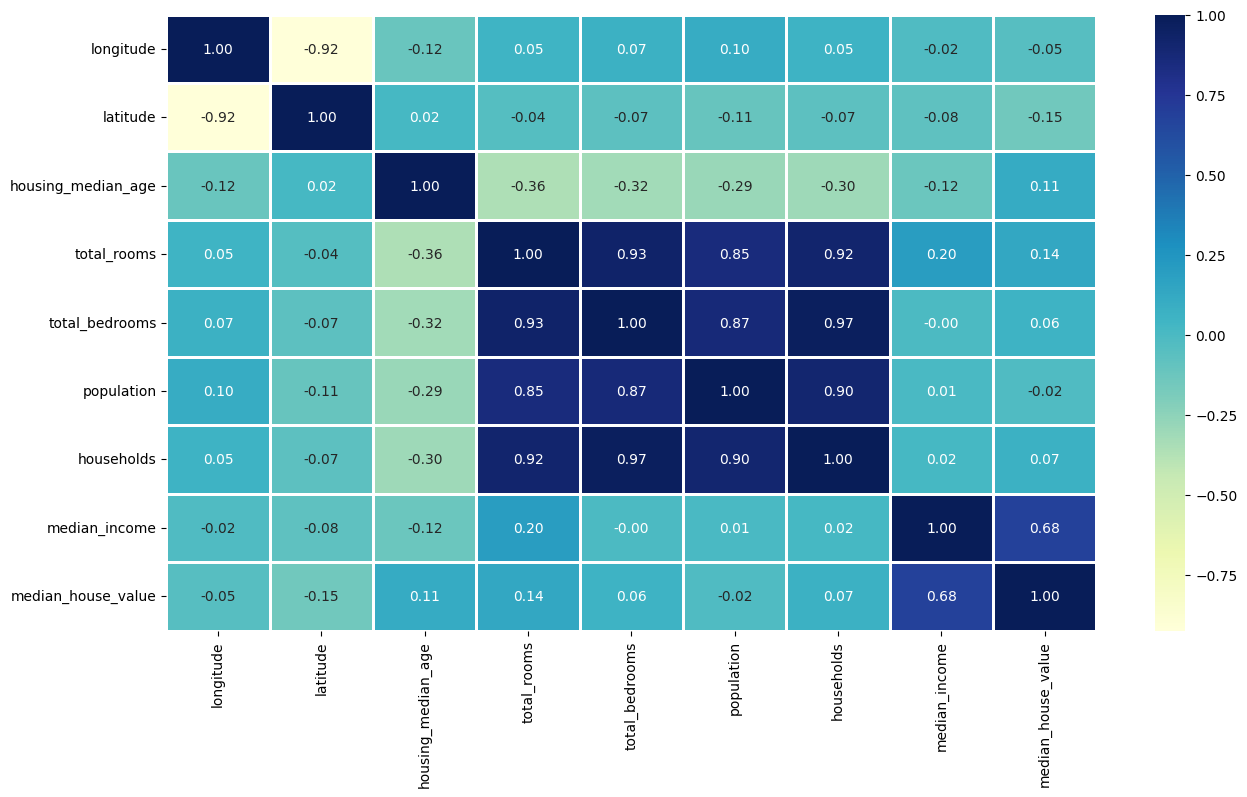

In [12]:
train_corr = train_data.corr(numeric_only=True)

f, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(train_corr, annot=True, linewidths=1, ax=ax, cmap='YlGnBu', fmt=".2f")
plt.show()

- Normalize the data before using the model

In [13]:
cols = ['total_rooms', 'total_bedrooms', 'population', 'households']

for col in cols:
    train_data[col] = np.log(train_data[col] + 1)

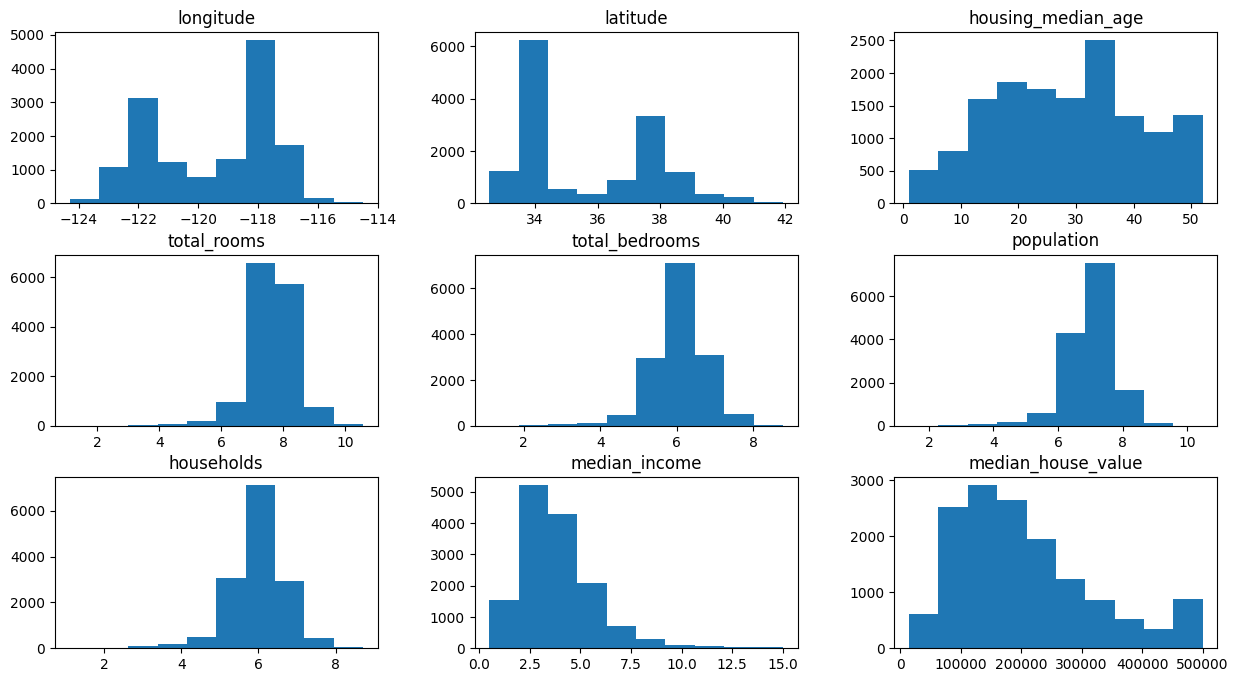

In [14]:
train_data.hist(figsize=(15, 8), grid=False)
plt.show()

In [15]:
train_data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     6336
INLAND        4654
NEAR OCEAN    1860
NEAR BAY      1594
ISLAND           4
Name: count, dtype: int64

- Using dummies

- Remove the ocean proximity columns because now its unnecessary

In [16]:
dummies = pd.get_dummies(train_data['ocean_proximity'], dtype=int, dummy_na=False)
train_data = pd.concat([train_data, dummies], axis=1)
train_data.drop(['ocean_proximity'], axis=1, inplace=True)

In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14448 entries, 17854 to 8165
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14448 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   median_house_value  14448 non-null  float64
 9   <1H OCEAN           14448 non-null  int64  
 10  INLAND              14448 non-null  int64  
 11  ISLAND              14448 non-null  int64  
 12  NEAR BAY            14448 non-null  int64  
 13  NEAR OCEAN          14448 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 2.2 MB


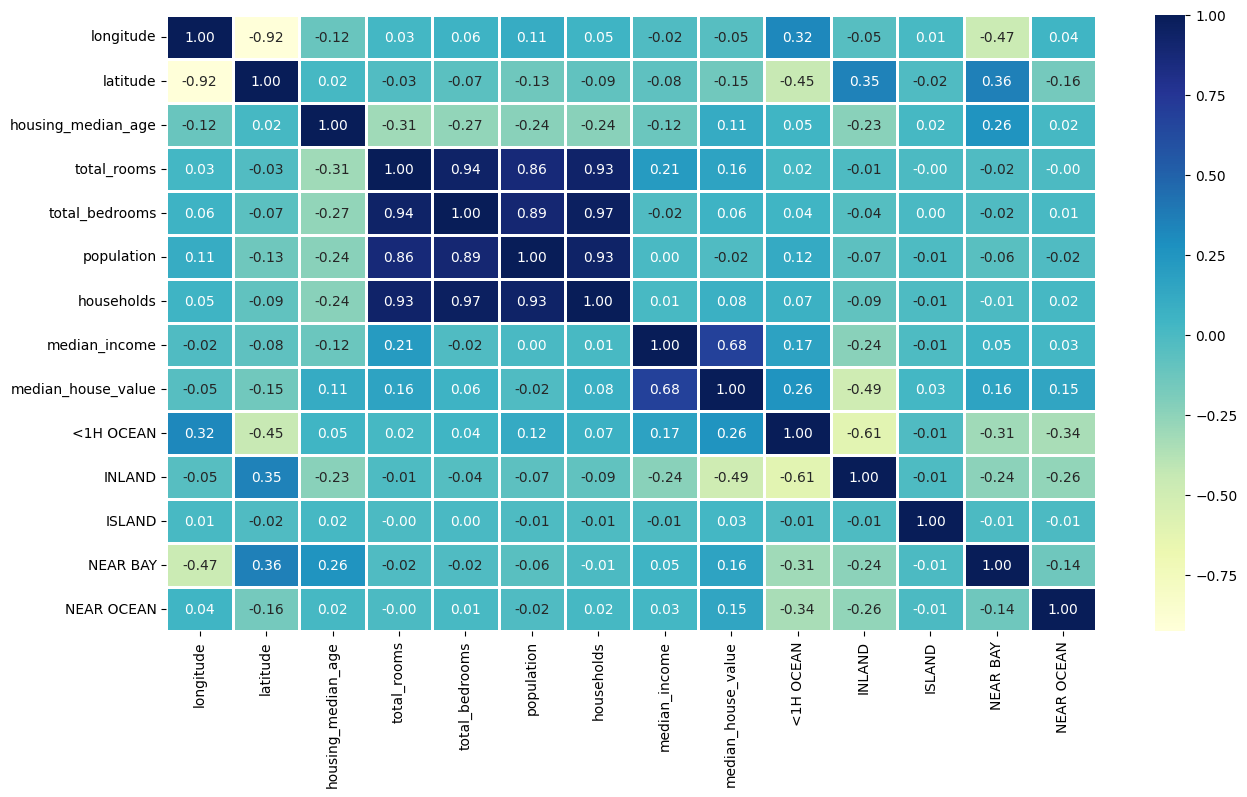

In [18]:
train_corr = train_data.corr(numeric_only=True)

f, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(train_corr, annot=True, linewidths=1, ax=ax, cmap='YlGnBu', fmt=".2f")
plt.show()

- Scatterploting

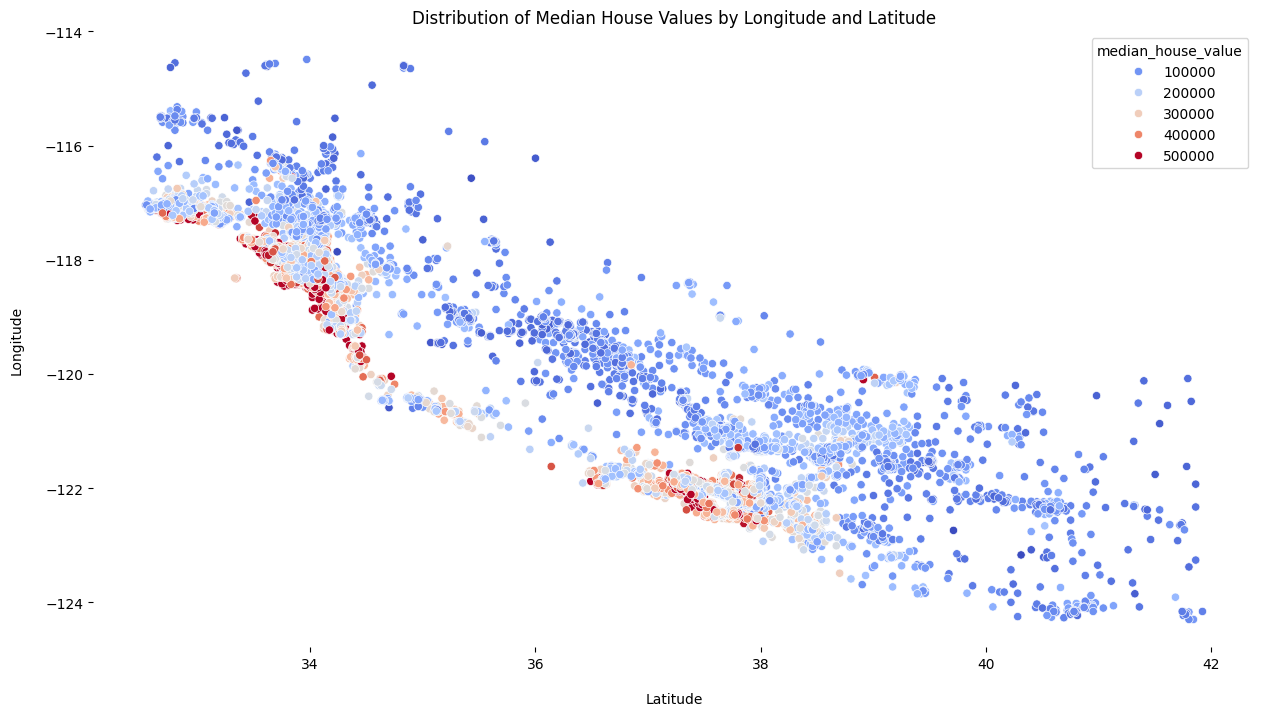

In [19]:
f, ax = plt.subplots(figsize=(15, 8))

sns.scatterplot(data=train_data, x='latitude', y='longitude', ax=ax, hue='median_house_value', palette='coolwarm')

ax.set_title('Distribution of Median House Values by Longitude and Latitude')
ax.set_xlabel(xlabel='Latitude', labelpad=15)
ax.set_ylabel(ylabel='Longitude', labelpad=15)
sns.despine(left=True, bottom=True)

plt.show()

### Feature Engineering

In [20]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

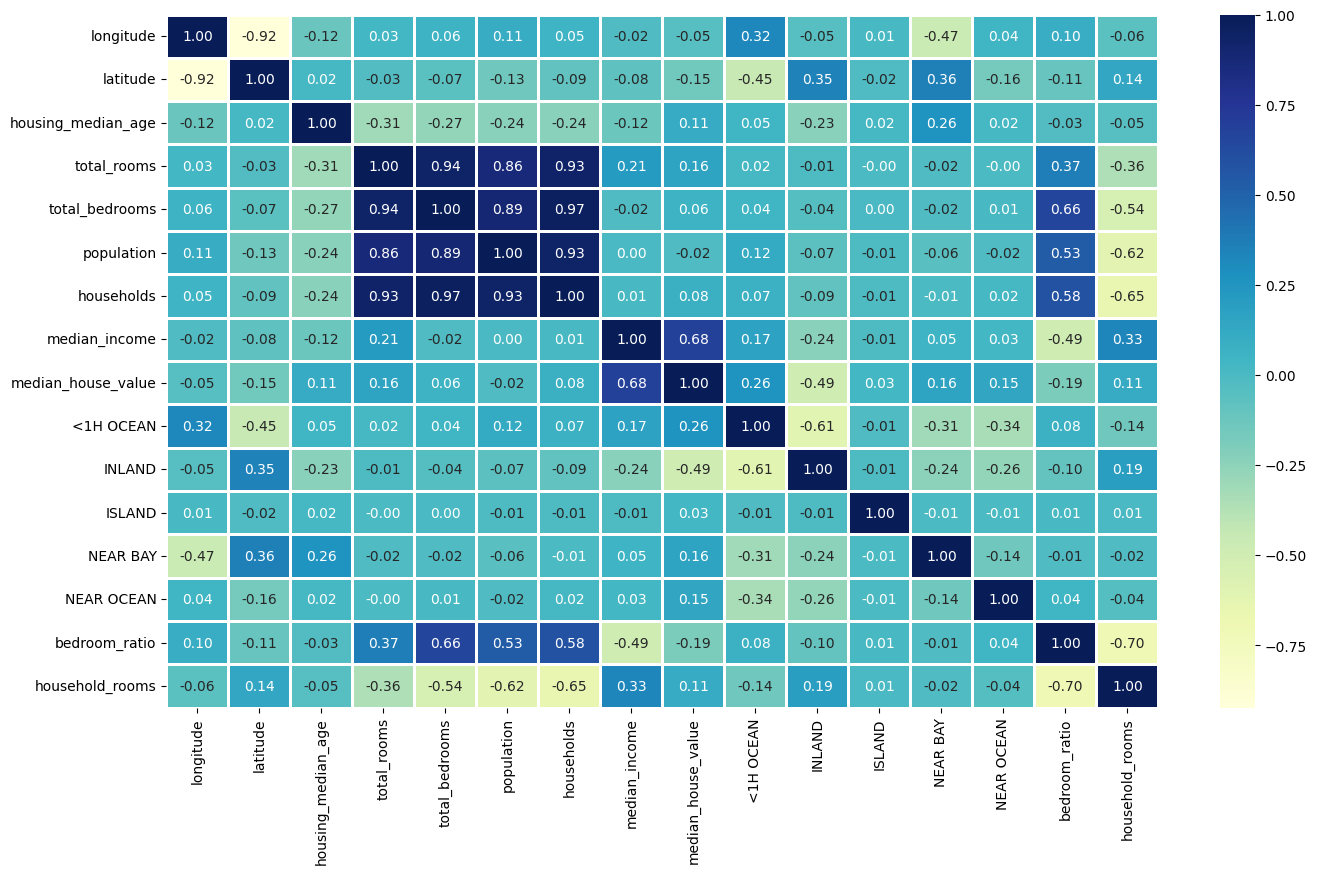

In [21]:
train_corr = train_data.corr(numeric_only=True)

f, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(train_corr, annot=True, linewidths=1, ax=ax, cmap='YlGnBu', fmt=".2f")
plt.show()

## Import of Machine Learning Models 

### Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

reg = LinearRegression()
scaler = StandardScaler()

X_train = train_data.drop(columns=['median_house_value'])
X_train_scaled = scaler.fit_transform(X_train)
y_train = train_data['median_house_value']

reg.fit(X_train_scaled, y_train)

LinearRegression()

In [23]:
test_data = X_test.join(y_test)

cols = ['total_rooms', 'total_bedrooms', 'population', 'households']

for col in cols:
    test_data[col] = np.log(test_data[col] + 1)

dummies_test = pd.get_dummies(test_data['ocean_proximity'], dtype=int, dummy_na=False)
test_data = pd.concat([test_data, dummies_test], axis=1)
test_data.drop(['ocean_proximity'], axis=1, inplace=True)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [24]:
X_test = test_data.drop(columns=['median_house_value']) 
X_test_scaled = scaler.transform(X_test)
y_test = test_data['median_house_value']

In [25]:
score_reg = reg.score(X_test_scaled, y_test)
print(f"Score: {score_reg:.3f}")

Score: 0.664


### Random Forest

In [26]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [27]:
score_forest = forest.score(X_test_scaled, y_test)

print(f"Score: {score_forest:.3f}")

Score: 0.816


In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [200, 240, 275, 290],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, 
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [200, 240, 275, 290]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [51]:
grid_search.best_estimator_

RandomForestRegressor(min_samples_split=4, n_estimators=290)

In [53]:
best = grid_search.best_estimator_.score(X_test_scaled, y_test)
print(f"Score: {best:.3f}")

Score: 0.816
